<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy

Import pandas module


In [2]:
import pandas as pd
import numpy as np

Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Display the first few duplicate rows
df[df.duplicated()].head()


Number of duplicate rows: 20


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
## Write your code here
duplicates = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]
# Check identical values across duplicates
identical_counts = (duplicates.groupby(['MainBranch', 'Employment', 'RemoteWork'])
                    .nunique()
                    .eq(1)
                    .sum())
print("Columns frequently identical across duplicates:")
print(identical_counts[identical_counts > 0])


Columns frequently identical across duplicates:
Age                     30
Check                  319
CodingActivities         1
EdLevel                 23
LearnCode               12
                      ... 
JobSatPoints_11         56
SurveyLength            75
SurveyEase              58
ConvertedCompYearly     35
JobSat                  45
Length: 110, dtype: int64


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


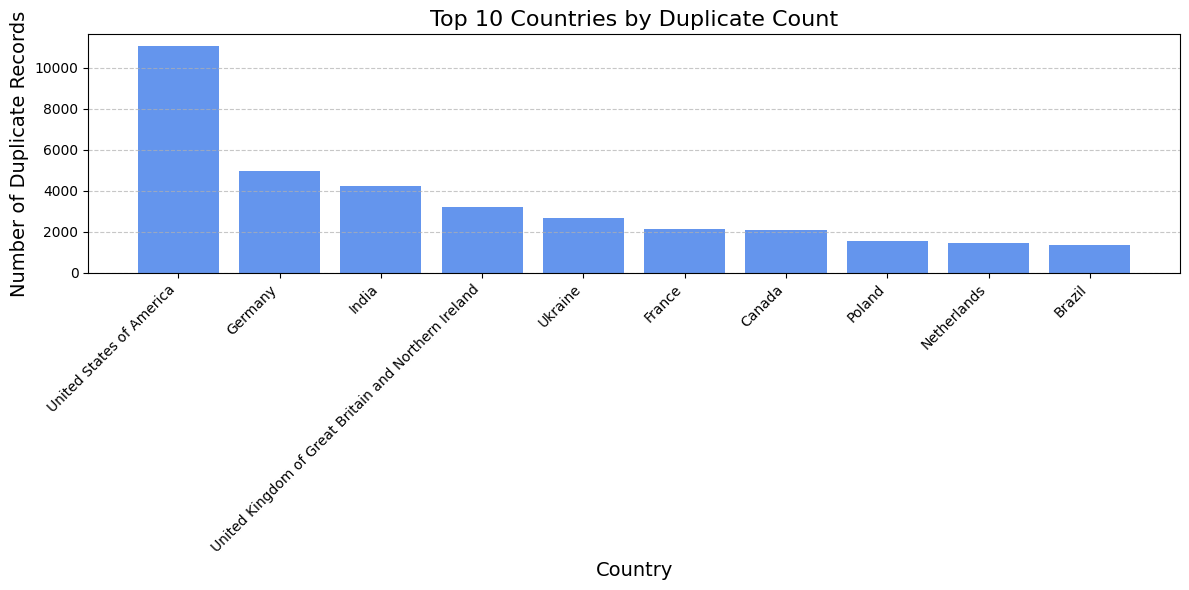

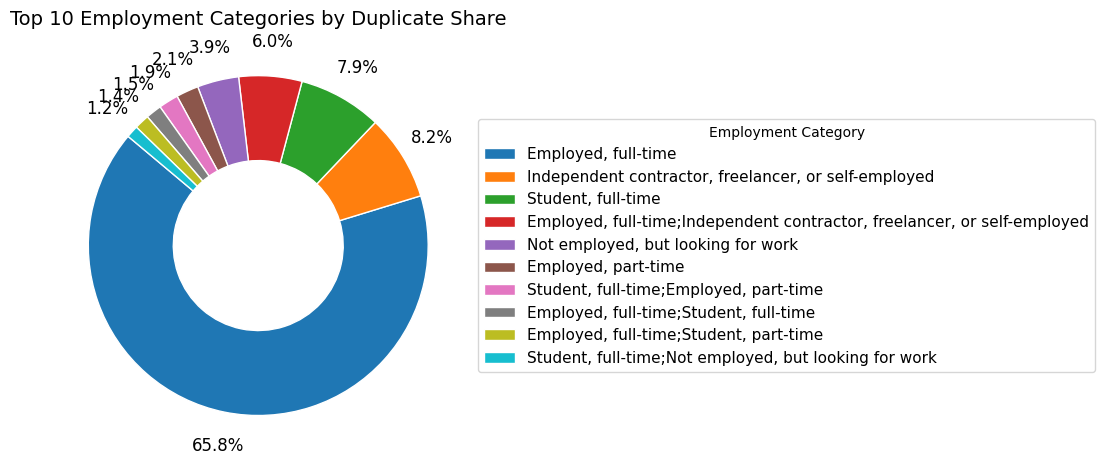

In [8]:
# Bar Chart: Top 10 Countries by Duplicate Count
top_countries = duplicates['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='cornflowerblue')
plt.title('Top 10 Countries by Duplicate Count', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Duplicate Records', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart: Top 10 Employment Categories by Duplicate Share
top_employment = duplicates['Employment'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    top_employment.values,
    startangle=140,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    autopct='%1.1f%%',
    pctdistance=1.2,  # Push percentage labels outside
    textprops={'fontsize': 12}
)
# Add leader lines and external labels manually
for i, text in enumerate(texts):
    text.set_position((1.6 * text.get_position()[0], 1.6 * text.get_position()[1]))  # Push labels further out
# Add legend for category names
plt.legend(
    labels=top_employment.index,
    title='Employment Category',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
plt.title('Top 10 Employment Categories by Duplicate Share', fontsize=14)
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [9]:
## Write your code here
# Define the subset of columns that define uniqueness
key_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Remove duplicates based on those columns
df_cleaned = df.drop_duplicates(subset=key_columns)

# Optional: Reset index for a clean DataFrame
df_cleaned.reset_index(drop=True, inplace=True)
print(df.shape ,"to",df_cleaned.shape)


(65457, 114) to (561, 114)


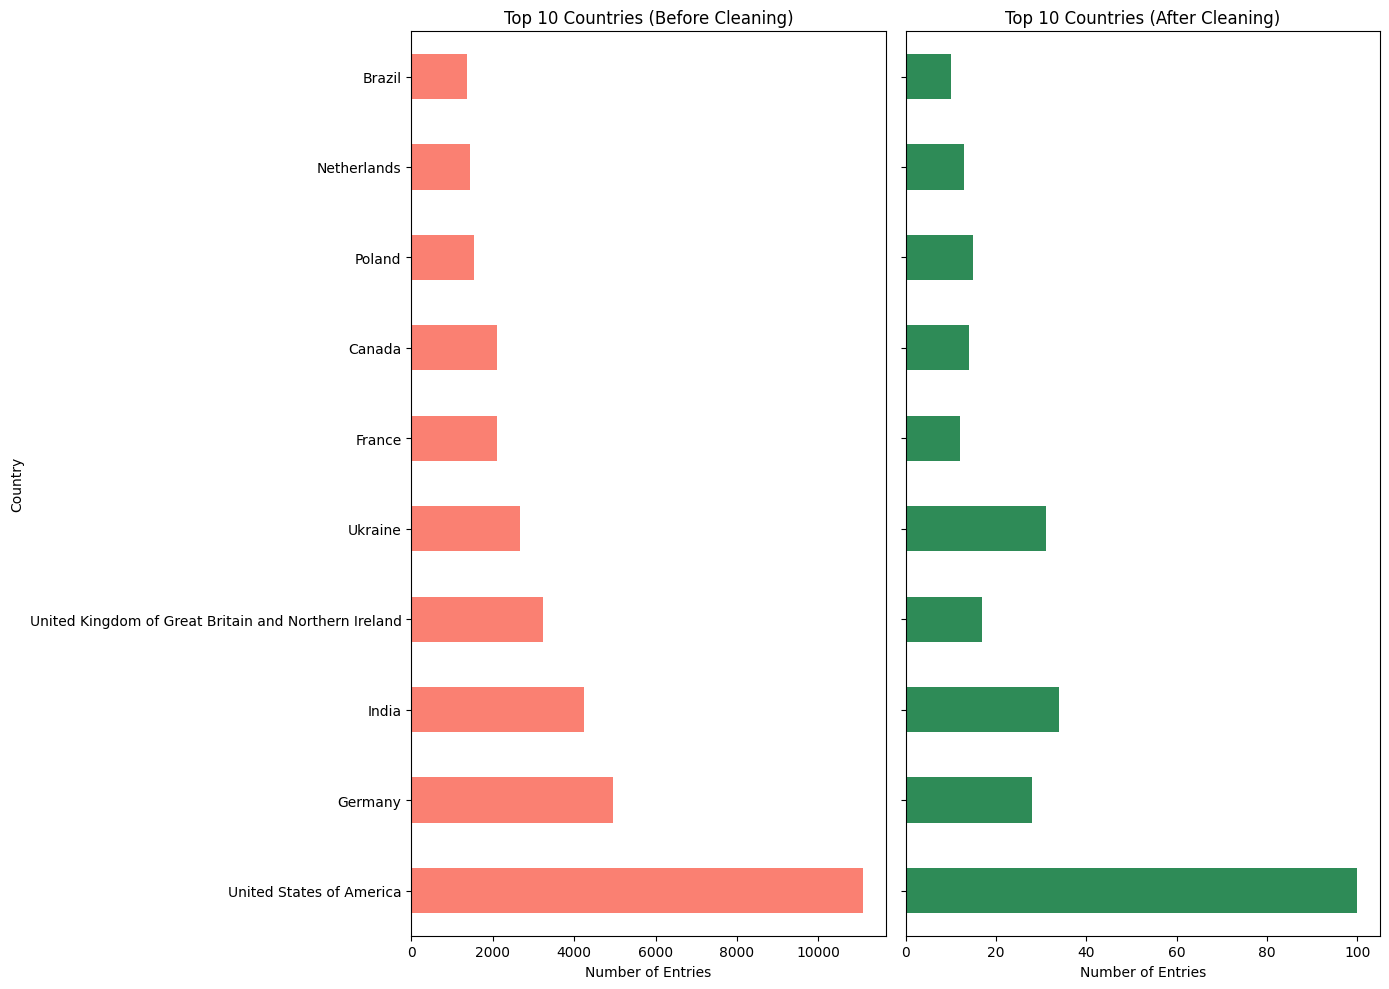

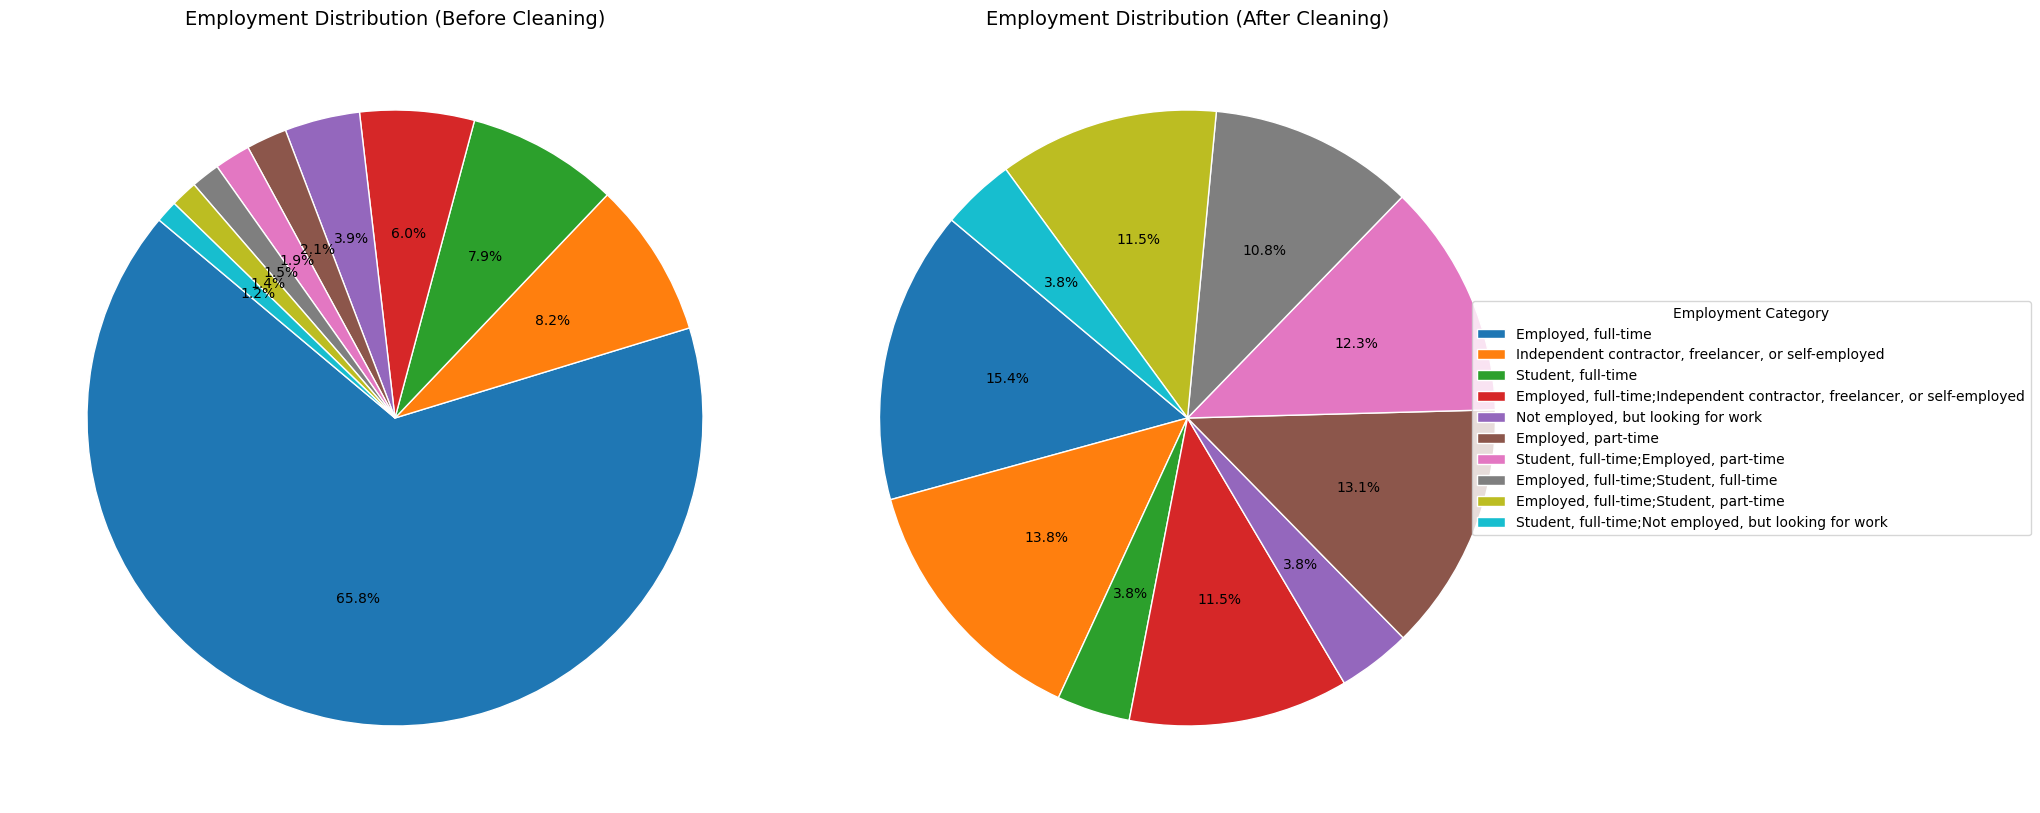

In [10]:
# Get top 10 countries before and after cleaning
top10_before = df['Country'].value_counts().nlargest(10)
top10_after = df_cleaned['Country'].value_counts().reindex(top10_before.index)

#  Bar Charts comparison of top 10 countries before and after cleaning
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10), sharey=True)

# Before cleaning
top10_before.plot(kind='barh', ax=axes[0], color='salmon')
axes[0].set_title('Top 10 Countries (Before Cleaning)')
axes[0].set_xlabel('Number of Entries')
axes[0].set_ylabel('Country')

# After cleaning
top10_after.plot(kind='barh', ax=axes[1], color='seagreen')
axes[1].set_title('Top 10 Countries (After Cleaning)')
axes[1].set_xlabel('Number of Entries')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#  pie chart of top 10 employment categories before and after cleaning
top10_employment_before = df['Employment'].value_counts().nlargest(10)
top10_employment_after = df_cleaned['Employment'].value_counts().reindex(top10_employment_before.index)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Before
wedges1, _, _ = axs[0].pie(
    top10_employment_before.values,
    startangle=140,
    autopct='%1.1f%%',
    labels=None,
    wedgeprops=dict(edgecolor='w')
)
axs[0].set_title('Employment Distribution (Before Cleaning)', fontsize=14)

# After
wedges2, _, _ = axs[1].pie(
    top10_employment_after.values,
    startangle=140,
    autopct='%1.1f%%',
    labels=None,
    wedgeprops=dict(edgecolor='w')
)
axs[1].set_title('Employment Distribution (After Cleaning)', fontsize=14)

# Shared legend
fig.legend(
    wedges1,
    top10_employment_before.index,
    title='Employment Category',
    loc='center',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=10
)

plt.tight_layout()
plt.show()


In [11]:

print("Original count =",df.shape,", Number of rows remaining after removal =", df_cleaned.shape)


# Save the cleaned dataset to a CSV file
df_cleaned.to_csv('cleaned_survey_data.csv', index=False)


Original count = (65457, 114) , Number of rows remaining after removal = (561, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
